<a href="https://colab.research.google.com/github/bijmuj/ML/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Simple Linear Regression

When you have only two numeric attributes, with only one being linearly dependent on the other, it is usually best to just use a simple linear model, i.e, y = a + bx, where y is the dependent variable and x is the independent one. You usually do not already know the value of the slope(b) and intercept(a). In which case you can use linear regression(line-fitting) to calculate them.

In [1]:
!pip install --upgrade -q pip jax jaxlib

     |████████████████████████████████| 1.6 MB 26.8 MB/s 


In [2]:
import jax
from jax import numpy as jnp, random
from matplotlib import pyplot as plt
%matplotlib inline

## Generating Data

For simplicities sake, rather finding an actual dataset I created my own. The linear relation here is simply y = 50 + 100x. To make it closer to real life data I added some noise in the range -10 to 10. Later when we compute a and b they should come close to 50 and 100.

In [4]:
# Creating the keys for jax's pseudorandom number generator
key = random.PRNGKey(1111)
k1, k2 = random.split(key)

x = random.normal(k1, (100, 1), dtype='float32') 
k1, k2 = random.split(k2)
noise = random.uniform(k1, (100, 1), minval=-10, maxval=10, dtype='float32')

y = x * 100 + noise + 50

## Showing Linear Relation between x and y

We know that x and y are linearly related in this case because we created them that way. But when we do not know the data generation process and the rules governing it, we need to figure out if there is a linear relation between them before trying to do linear regression. The easiest method is to plot the values on a graph:

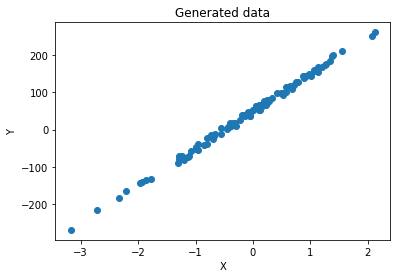

In [5]:
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Generated data")
plt.show()

Another way to look for a linear relation to compute the correlation coefficient r.
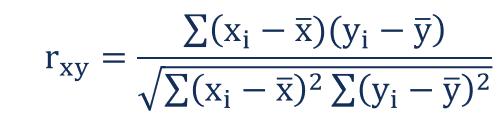

The value of r ranges between -1 and 1. If the r value is 0 then the variables are not correlated, i.e, no linear relation. On the other hand, if the value lies close to one of the extremes, we can say the variables are highly correlated.

In [7]:
x_bar = jnp.mean(x)
y_bar = jnp.mean(y)
cov_xy = jnp.sum((x - x_bar) * (y - y_bar))
cov_xx = jnp.sum(jnp.power(x - x_bar, 2))
cov_yy = jnp.sum(jnp.power(y - y_bar, 2))
r_xy = cov_xy / jnp.sqrt(cov_xx * cov_yy)
print(f'Correlation Coefficient = {r_xy}')

Correlation Coefficient = 0.9985909461975098


Or if we just use the built-in corrcoef function in jax.numpy, we get the correlation coefficients of xx, xy, yx and yy. Notice that the correlation coefficient of xy and yx are the same, that is because the correlation formula is invariant to the order of variables.

In [15]:
jnp.corrcoef(x, y, rowvar=0)

DeviceArray([[0.9999999, 0.9985909],
             [0.9985909, 1.       ]], dtype=float32)

Both methods gave us a correlation value of around 0.9986, which is pretty high, as it should be in this case.

# Doing Linear Regression

To find a and b we will be using the following two formulas:

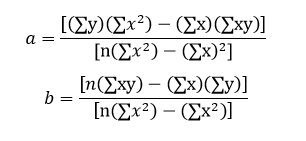

In [16]:
n = 100

sum_x = jnp.sum(x)
sum_y = jnp.sum(y)
sum_x2 = jnp.sum(jnp.power(x, 2))
sum_xy = jnp.sum(x * y)

# common denominator, so only computing once
denominator = (n * sum_x2 - jnp.power(sum_x, 2))
a = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
b = (n * sum_xy - sum_x * sum_y) / denominator

print(f'a = {a}\nb = {b}')

a = 49.72011184692383
b = 99.8991928100586


As you can see, we got values really close to 50 and 100. The small deviations are there due to the noise.

## Predictions and their Accuracy

We will be using the original y = a + bx formula to predict y values for each x, here called yhat. Then we are going to use Mean Square Error(MSE) and Root Mean Square Error(RMSE) as our accuracy(smaller is better).

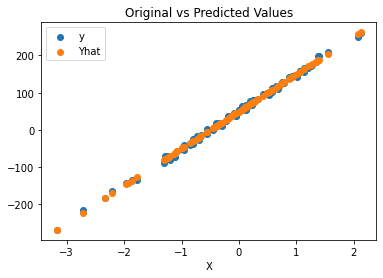

In [23]:
yhat = a + b * x

plt.scatter(x, y, label='y')
plt.scatter(x, yhat, label='Yhat', )
plt.title("Original vs Predicted Values")
plt.xlabel('X')
plt.legend(loc='upper left')
plt.show()

This plot looks like an even straighter line than the original because linear regression does not take into account the noise in the original data.

In [19]:
mse = jnp.mean(jnp.power(y - yhat, 2))
rmse = jnp.sqrt(mse)

print(f'MSE = {mse}\nRMSE = {rmse}')

MSE = 28.701101303100586
RMSE = 5.3573408126831055


Pretty small values for MSE and RMSE which is what we want.

## Conclusion

Here I have demonstrated how to find the existance of a linear relationship between two variables and used linear regression to model that relation to a reasonable level of accuracy.